<div style="text-align:right;">Basic Structure in Tensorflow</div>
<div style="text-align:right;">Brickea with material from mofan python</div>

# Structure in Tensorflow

In [47]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


## Simple Structure

### Data generation

In [48]:
x_data = np.random.rand(100).astype(np.float32)
x_data

array([0.856563  , 0.7919942 , 0.57215154, 0.36962438, 0.67014974,
       0.07575881, 0.32986468, 0.22069032, 0.99691445, 0.10108984,
       0.46145758, 0.4194175 , 0.18136273, 0.9019044 , 0.20671162,
       0.49744433, 0.75049067, 0.29405808, 0.9959513 , 0.18489236,
       0.22427563, 0.47551623, 0.41200915, 0.5211755 , 0.18753509,
       0.6133589 , 0.54103196, 0.39585635, 0.55967695, 0.93438095,
       0.504667  , 0.8519719 , 0.2729622 , 0.5605312 , 0.30694523,
       0.9689762 , 0.48319623, 0.84391594, 0.8791369 , 0.04377215,
       0.9508798 , 0.52879584, 0.8301157 , 0.5227329 , 0.63959545,
       0.23335704, 0.9583173 , 0.6724637 , 0.04314533, 0.25977185,
       0.6945791 , 0.48814458, 0.20050849, 0.34990767, 0.813801  ,
       0.61303055, 0.03293644, 0.76219   , 0.27827746, 0.73102975,
       0.29768908, 0.29578486, 0.36493015, 0.213511  , 0.08259652,
       0.40614206, 0.6774119 , 0.5310335 , 0.13906835, 0.3289498 ,
       0.5951128 , 0.07632565, 0.39437354, 0.6133687 , 0.80120

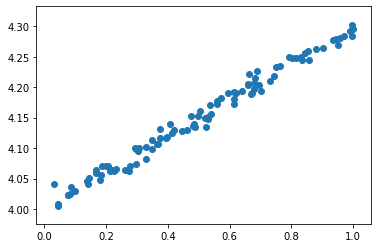

In [49]:
y_data = x_data * 0.3 + 4 + np.random.normal(loc=0,scale=0.01,size=100) # we need add some noise
plt.scatter(x_data,y_data) 

### Create Model

In [50]:
Weights = tf.Variable(tf.random.uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

### Calculate the Loss

In [51]:
loss = tf.reduce_mean(tf.square(y-y_data))

### Back-propagation Optimizer

In [52]:
# User gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

### Train

In [54]:
# init all Variables
init = tf.global_variables_initializer()  # 替换成这样就好

In [61]:
sess = tf.Session()
sess.run(init)

sess.close()

In [56]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [2.501381] [3.8589559]
20 [0.8348431] [3.7143216]
40 [0.4585437] [3.9152803]
60 [0.3440367] [3.9764316]
80 [0.30919248] [3.9950397]
100 [0.2985896] [4.0007024]
120 [0.29536298] [4.002425]
140 [0.29438135] [4.0029497]
160 [0.2940825] [4.003109]
180 [0.2939918] [4.0031576]
200 [0.29396418] [4.0031724]


## Session Control

Session 是 Tensorflow 为了控制,和输出文件的执行的语句. 运行 session.run() 可以获得你要得知的运算结果, 或者是你所要运算的部分.

In [62]:
# 加载 Tensorflow ，然后建立两个 matrix ,输出两个 matrix 矩阵相乘的结果。

matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                       [2]])

In [63]:
product = tf.matmul(matrix1,matrix2)

In [66]:
# One method
sess = tf.Session()

print(sess.run(product))

sess.close()

[[12]]


In [70]:
# Another method
with tf.Session() as sess:
    print(sess.run(product))
    

[[12]]


## Variables

在 Tensorflow 中，定义了某字符串是变量，它才是变量，这一点是与 Python 所不同的。

In [72]:
state = tf.Variable(0,name = 'counter')

# 定义常量 one
one = tf.constant(1)

# 定义加法步骤 (注: 此步并没有直接计算)
new_value = tf.add(state, one)

# 将 State 更新成 new_value
update = tf.assign(state, new_value)

如果你在 Tensorflow 中设定了变量，那么初始化变量是最重要的！！所以定义了变量以后, 一定要定义 init = tf.initialize_all_variables() .

到这里变量还是没有被激活，需要再在 sess 里, sess.run(init) , 激活 init 这一步.

In [74]:
init = tf.global_variables_initializer()

In [77]:
with tf.Session() as sess:
    sess.run(init)
    i = 10
    while(i):
        i-=1
        sess.run(new_value)
        print(sess.run(update))

1
2
3
4
5
6
7
8
9
10


## Placeholder

这一次我们会讲到 Tensorflow 中的 placeholder , placeholder 是 Tensorflow 中的占位符，暂时储存变量.

Tensorflow 如果想要从外部传入data, 那就需要用到 tf.placeholder(), 然后以这种形式传输数据 sess.run(***, feed_dict={input: **}).

In [78]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)

接下来, 传值的工作交给了 sess.run() , 需要传入的值放在了feed_dict={} 并一一对应每一个 input. placeholder 与 feed_dict={} 是绑定在一起出现的。

In [81]:
with tf.Session() as sess:
    print(sess.run(output,feed_dict = {input1:[3.],input2:[2.]}))

[6.]
